In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Overview

In [196]:
stats = pd.read_csv("UK-statistics-cleaned.csv")

In [3]:
stats.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United Kingdom,GBR,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.215540e+01,1.177672e+01,1.219276e+01,1.280503e+01,1.328314e+01,1.379686e+01,1.325384e+01,1.281462e+01,1.197097e+01,NaN
1,United Kingdom,GBR,Transport services (% of commercial service ex...,TX.VAL.TRAN.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.044273e+01,1.023326e+01,1.052537e+01,1.042766e+01,1.086432e+01,1.070288e+01,1.013663e+01,1.016392e+01,9.697650e+00,NaN
2,United Kingdom,GBR,Commercial service exports (current US$),TX.VAL.SERV.CD.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,2.860000e+11,3.300000e+11,3.360000e+11,3.600000e+11,3.880000e+11,3.690000e+11,3.600000e+11,3.720000e+11,4.050000e+11,NaN
3,United Kingdom,GBR,"Computer, communications and other services (%...",TX.VAL.OTHR.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,4.434318e+01,4.356506e+01,4.467153e+01,4.426253e+01,4.531096e+01,4.697982e+01,4.835545e+01,5.016917e+01,5.108982e+01,NaN
4,United Kingdom,GBR,Merchandise exports by the reporting economy (...,TX.VAL.MRCH.WL.CD,1.034090e+10,1.079710e+10,1.108620e+10,1.193530e+10,1.251210e+10,1.341540e+10,...,4.160000e+11,5.060000e+11,4.730000e+11,5.400000e+11,5.050000e+11,4.600000e+11,4.090000e+11,4.410000e+11,4.870000e+11,NaN


In [4]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    515 non-null    object 
 1   Country Code    515 non-null    object 
 2   Indicator Name  515 non-null    object 
 3   Indicator Code  515 non-null    object 
 4   1960            196 non-null    float64
 5   1961            222 non-null    float64
 6   1962            226 non-null    float64
 7   1963            230 non-null    float64
 8   1964            225 non-null    float64
 9   1965            230 non-null    float64
 10  1966            232 non-null    float64
 11  1967            230 non-null    float64
 12  1968            234 non-null    float64
 13  1969            238 non-null    float64
 14  1970            401 non-null    float64
 15  1971            471 non-null    float64
 16  1972            498 non-null    float64
 17  1973            499 non-null    flo

# Population

In [5]:
[i for i in stats["Indicator Name"] if "population" in i][0:7]
#creating a dataframe with selected population figures: urban, rural

['Urban population',
 'Urban population growth (annual %)',
 'Rural population (% of total population)',
 'Rural population growth (annual %)',
 'Rural population',
 'Population, male (% of total population)',
 'Population, female (% of total population)']

In [6]:
[i for i in stats["Indicator Name"] if "Population" in i][0:6]
#creating a dataframe with selected population figures: total, male, female, urban, rural

['Population, male (% of total population)',
 'Population, male',
 'Population, female (% of total population)',
 'Population, female',
 'Population, total',
 'Population growth (annual %)']

In [7]:
pop_df = stats[stats["Indicator Name"].isin(["Population, total","Population, male","Population, female",
                              "Urban population","Rural population"])]
pop_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
43,United Kingdom,GBR,Urban population,SP.URB.TOTL,41104656.0,41381472.0,41661202.0,41900114.0,42098400.0,42294196.0,...,51030310.0,51600211.0,52130345.0,52650595.0,53209683.0,53802927.0,54382825.0,54923317.0,55426598.0,NaN
47,United Kingdom,GBR,Rural population,SP.RUR.TOTL,11295344.0,11418528.0,11588798.0,11749886.0,11901600.0,12053854.0,...,11736055.0,11658599.0,11569870.0,11477678.0,11392615.0,11313292.0,11228768.0,11135542.0,11033746.0,NaN
49,United Kingdom,GBR,"Population, male",SP.POP.TOTL.MA.IN,25305010.0,25522300.0,25765002.0,25982724.0,26172821.0,26356866.0,...,30834622.0,31097291.0,31335746.0,31567929.0,31822154.0,32094826.0,32356947.0,32594185.0,32807966.0,NaN
51,United Kingdom,GBR,"Population, female",SP.POP.TOTL.FE.IN,27094990.0,27277700.0,27484998.0,27667276.0,27827179.0,27991184.0,...,31931743.0,32161519.0,32364469.0,32560344.0,32780144.0,33021393.0,33254646.0,33464674.0,33652378.0,NaN
52,United Kingdom,GBR,"Population, total",SP.POP.TOTL,52400000.0,52800000.0,53250000.0,53650000.0,54000000.0,54348050.0,...,62766365.0,63258810.0,63700215.0,64128273.0,64602298.0,65116219.0,65611593.0,66058859.0,66460344.0,NaN


In [8]:
pop_df = pop_df.transpose()

In [9]:
pop_df.columns = pop_df.loc["Indicator Name"].values

In [10]:
pop_df.drop(["Country Name", "Country Code", "Indicator Name", "Indicator Code"], inplace=True)

In [11]:
pop_df.head()

,Urban population,Rural population,"Population, male","Population, female","Population, total"
1960,4.11047e+07,1.12953e+07,2.5305e+07,2.7095e+07,5.24e+07
1961,4.13815e+07,1.14185e+07,2.55223e+07,2.72777e+07,5.28e+07
1962,4.16612e+07,1.15888e+07,2.5765e+07,2.7485e+07,5.325e+07
1963,4.19001e+07,1.17499e+07,2.59827e+07,2.76673e+07,5.365e+07
1964,4.20984e+07,1.19016e+07,2.61728e+07,2.78272e+07,5.4e+07


In [12]:
pop_df.dropna(inplace=True)
#2019 row was null

In [13]:
pop_df = pop_df.astype(int)

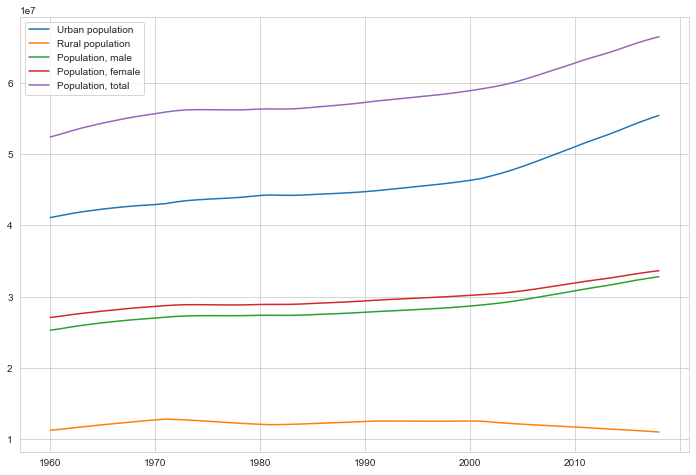

In [14]:
pop_df.plot(figsize=(12,8))
#overall population is steadily increasing
#overall pop seems to be influenced by urban pop increase
#male and female increase at about the same rate
#rural pop is in decline

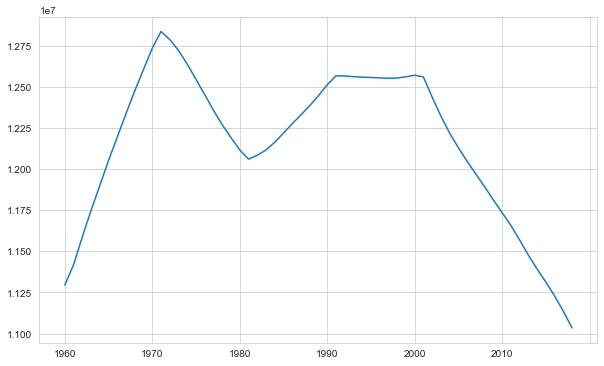

In [15]:
pop_df["Rural population"].plot(figsize=(10,6))

In [16]:
rur2000 = pop_df["Rural population"]["2000"]
rur2018 = pop_df["Rural population"]["2018"]

(rur2018 - rur2000) / rur2000
#12.2% drop in rural pop from 2000 to 2018

-0.12242277337489978

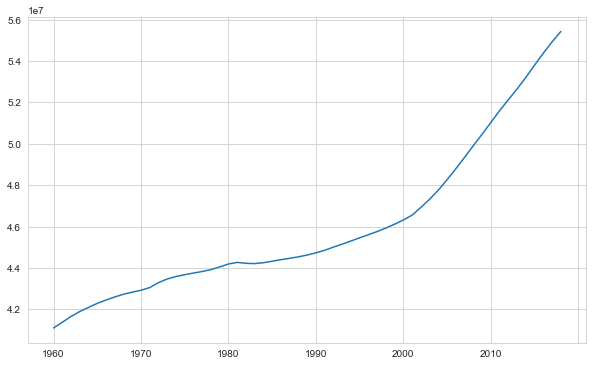

In [17]:
pop_df["Urban population"].plot(figsize=(10,6))

In [18]:
urb2000 = pop_df["Urban population"]["2000"]
urb2018 = pop_df["Urban population"]["2018"]

(urb2018 - urb2000) / urb2000
#19.7% increase in urban population from 2000 to 2018

0.19661345594649654

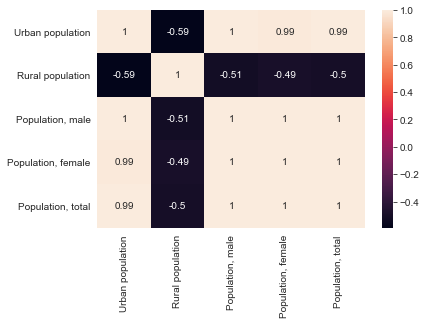

In [19]:
sns.heatmap(pop_df.corr(), annot=True)
#perfect correlation, shows integrity of the statistics

In [20]:
pop_df[["Urban population", "Rural population"]].corr()

,Urban population,Rural population
Urban population,1.000000,-0.590236
Rural population,-0.590236,1.000000


## Rural population forecast (SINGLE FEATURE)

In [21]:
r_pop_x = pop_df["Rural population"]

In [22]:
len(r_pop_x)

59

In [23]:
r_pop_x.shape

(59,)

In [24]:
#determine test size, 9 years and create index for split
r_test_size = 10
r_test_index = len(r_pop_x) - r_test_size

In [25]:
#split into unscaled test and train
r_train = pd.DataFrame(r_pop_x[:r_test_index])
r_test = pd.DataFrame(r_pop_x[r_test_index:])

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
#scale train and test
scaled_r_train = scaler.fit_transform(r_train)
scaled_r_test = scaler.transform(r_test)

### Build generators

In [29]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [30]:
#generator
length = 9 #must be smaller than test_size 10
generator = TimeseriesGenerator(scaled_r_train, scaled_r_train,
                               length=length, batch_size=1)

In [31]:
#validation generator
val_generator = TimeseriesGenerator(scaled_r_test, scaled_r_test,
                                   length=length, batch_size=1)

### Build model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [33]:
n_features = 1
#1 feature, rural pop number

In [34]:
model = Sequential()

model.add(LSTM(50, activation="relu",
               input_shape=(length, n_features)))

model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor="val_loss", patience=2)

In [38]:
model.fit(generator, validation_data=val_generator,
         epochs=20, callbacks=[early_stop])

Epoch 1/20
40/40 [==============================] - 1s 20ms/step - loss: 0.2095 - val_loss: 0.1857
Epoch 2/20
40/40 [==============================] - 0s 8ms/step - loss: 0.0332 - val_loss: 0.1643
Epoch 3/20
40/40 [==============================] - 0s 9ms/step - loss: 0.0297 - val_loss: 0.1979
Epoch 4/20
40/40 [==============================] - 0s 9ms/step - loss: 0.0290 - val_loss: 0.1887


### Initial forecast prediction

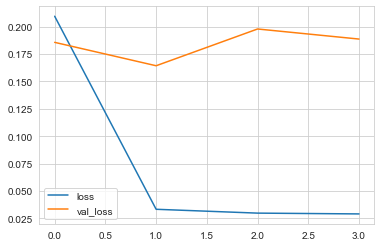

In [39]:
metrics = pd.DataFrame(model.history.history)
metrics.plot()

In [40]:
test_predictions = []

first_eval_batch = scaled_r_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(r_test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],
                             [[current_pred]], axis=1)

In [41]:
true_predictions = scaler.inverse_transform(test_predictions)

In [42]:
r_test["Predictions"] = true_predictions

In [43]:
r_test

,Rural population,Predictions
2009,11813186,1.218960e+07
2010,11736055,1.217386e+07
2011,11658599,1.215968e+07
2012,11569870,1.215135e+07
2013,11477678,1.214804e+07
2014,11392615,1.214886e+07
2015,11313292,1.215296e+07
2016,11228768,1.216003e+07
2017,11135542,1.216977e+07
2018,11033746,1.218219e+07


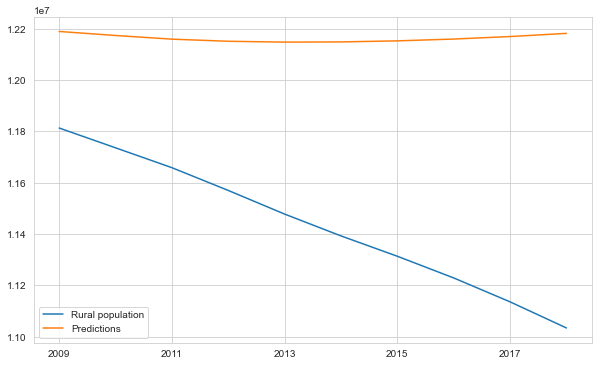

In [44]:
r_test.plot(figsize=(10,6))

## Population forecast (MULTIPLE FEATURES)

In [45]:
pop_df.head()

,Urban population,Rural population,"Population, male","Population, female","Population, total"
1960,41104656,11295344,25305010,27094990,52400000
1961,41381472,11418528,25522300,27277700,52800000
1962,41661202,11588798,25765002,27484998,53250000
1963,41900114,11749886,25982724,27667276,53650000
1964,42098400,11901600,26172821,27827179,54000000


In [46]:
len(pop_df)

59

In [47]:
pop_df.shape

(59, 5)

In [48]:
test_size = 10
split_index = len(pop_df) - test_size

In [49]:
train = pop_df[:split_index]
test = pop_df[split_index:]

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()

In [52]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

### Generators

In [53]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [54]:
length = 9

In [55]:
generator = TimeseriesGenerator(scaled_train, scaled_train,
                               length=length, batch_size=1)

In [56]:
val_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                   length=length, batch_size=1)

### Model

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [114]:
n_features = 5

In [115]:
model = Sequential()

model.add(LSTM(12, activation="relu",
              input_shape=(length, n_features)))

model.add(Dense(5))
model.compile(optimizer="adam", loss="mse")

In [116]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 12)                864       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 65        
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [117]:
from tensorflow.keras.callbacks import EarlyStopping

In [118]:
early_stop = EarlyStopping(patience=5, monitor="val_loss")

In [119]:
model.fit(generator, validation_data=val_generator,
         epochs=50, callbacks=[early_stop])

Epoch 1/50
50/50 [==============================] - 1s 28ms/step - loss: 0.1838 - val_loss: 0.1898
Epoch 2/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0634 - val_loss: 0.1997
Epoch 3/50
50/50 [==============================] - 1s 12ms/step - loss: 0.0343 - val_loss: 0.1088
Epoch 4/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0184 - val_loss: 0.6551
Epoch 5/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0104 - val_loss: 0.8817
Epoch 6/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0082 - val_loss: 0.5738
Epoch 7/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0076 - val_loss: 0.7306
Epoch 8/50
50/50 [==============================] - 0s 8ms/step - loss: 0.0064 - val_loss: 0.4369


### Predictions

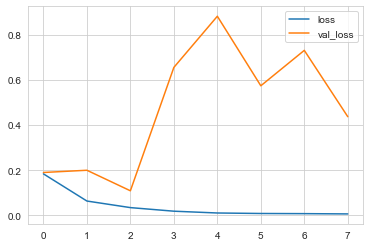

In [120]:
metrics = pd.DataFrame(model.history.history)
metrics.plot()

In [121]:
test_predictions = []

first_batch = scaled_train[-length:]
current_batch = first_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],
                              [[current_pred]], axis=1)

In [122]:
true_predictions = scaler.inverse_transform(test_predictions)

In [123]:
test["pUrb"] = true_predictions[:,0]
test["pRur"] = true_predictions[:,1]
test["pMale"] = true_predictions[:,2]
test["pFem"] = true_predictions[:,3]
test["pTot"] = true_predictions[:,4]
#["pUrb","pRur","pMale","pFem","pTot"]

<ipython-input-123-aaac479c2365>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["pUrb"] = true_predictions[:,0]
<ipython-input-123-aaac479c2365>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["pRur"] = true_predictions[:,1]
<ipython-input-123-aaac479c2365>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

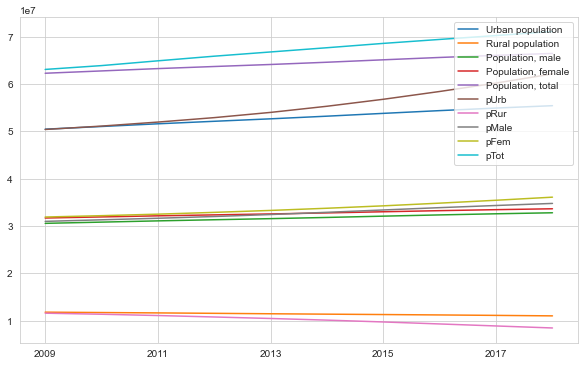

In [124]:
test.plot(figsize=(10,6))

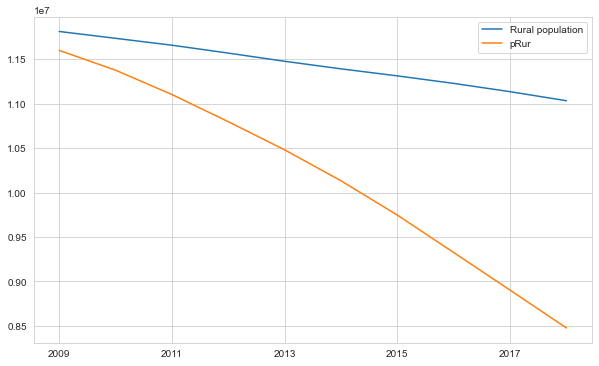

In [125]:
test[["Rural population", "pRur"]].plot(figsize=(10,6))

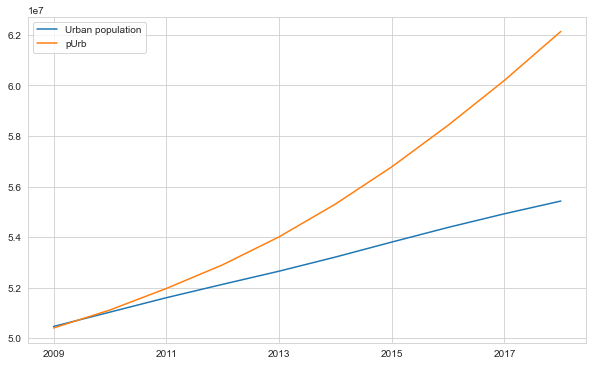

In [126]:
test[["Urban population","pUrb"]].plot(figsize=(10,6))

### Fullscale Forecast

In [127]:
full_scaler = MinMaxScaler()

In [128]:
full_scaled_df = full_scaler.fit_transform(pop_df)

In [129]:
length = 9

In [130]:
generator = TimeseriesGenerator(full_scaled_df, full_scaled_df,
                               length=length, batch_size=1)

In [131]:
full_model = Sequential()

full_model.add(LSTM(12, activation="relu",
                   input_shape=(length, n_features)))

full_model.add(Dense(5))
full_model.compile(optimizer="adam", loss="mse")

In [132]:
full_model.fit(generator, epochs=28)
#epochs based on previous amount of epochs run

Epoch 1/28
50/50 [==============================] - 0s 7ms/step - loss: 0.2676
Epoch 2/28
50/50 [==============================] - 0s 7ms/step - loss: 0.1287
Epoch 3/28
50/50 [==============================] - 0s 6ms/step - loss: 0.0608
Epoch 4/28
50/50 [==============================] - 0s 7ms/step - loss: 0.0494
Epoch 5/28
50/50 [==============================] - 0s 7ms/step - loss: 0.0424
Epoch 6/28
50/50 [==============================] - 0s 6ms/step - loss: 0.0377
Epoch 7/28
50/50 [==============================] - 0s 7ms/step - loss: 0.0334
Epoch 8/28
50/50 [==============================] - 0s 7ms/step - loss: 0.0299
Epoch 9/28
50/50 [==============================] - 0s 7ms/step - loss: 0.0265
Epoch 10/28
50/50 [==============================] - 0s 7ms/step - loss: 0.0238
Epoch 11/28
50/50 [==============================] - 0s 7ms/step - loss: 0.0192
Epoch 12/28
50/50 [==============================] - 0s 7ms/step - loss: 0.0157
Epoch 13/28
50/50 [==============================

In [133]:
# forecast

In [134]:
forecast = []
periods = 15 #how long to forecast into the future, 15 years

first_eval = full_scaled_df[-length:]
current_batch = first_eval.reshape((1,length,n_features))

for i in range(periods):
    current_pred = full_model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],
                             [[current_pred]], axis=1)

In [135]:
forecast = full_scaler.inverse_transform(forecast)

In [136]:
forecast_index = np.arange(2019, (2019+periods))

In [137]:
forecast_index

array([2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029,
       2030, 2031, 2032, 2033])

In [138]:
forecast_pop_df = pd.DataFrame(data=forecast, index=forecast_index,
                              columns=["fUrb","fRur","fMale","fFem","fTot"])

In [139]:
forecast_pop_df

,fUrb,fRur,fMale,fFem,fTot
2019,5.613302e+07,1.106939e+07,3.277220e+07,3.349698e+07,6.871246e+07
2020,5.669220e+07,1.106668e+07,3.304438e+07,3.368094e+07,6.920856e+07
2021,5.732566e+07,1.103755e+07,3.330422e+07,3.385188e+07,6.992119e+07
2022,5.802538e+07,1.100061e+07,3.358291e+07,3.403428e+07,7.073178e+07
2023,5.879782e+07,1.095539e+07,3.388104e+07,3.422705e+07,7.164915e+07
2024,5.964066e+07,1.090191e+07,3.419512e+07,3.442521e+07,7.266439e+07
2025,6.054887e+07,1.083947e+07,3.451873e+07,3.462157e+07,7.377152e+07
2026,6.152785e+07,1.076514e+07,3.484597e+07,3.480871e+07,7.498883e+07
2027,6.258511e+07,1.067517e+07,3.516958e+07,3.497717e+07,7.633871e+07
2028,6.371772e+07,1.056614e+07,3.547652e+07,3.511215e+07,7.782779e+07


In [140]:
pop_df.index = pop_df.index.astype(int)

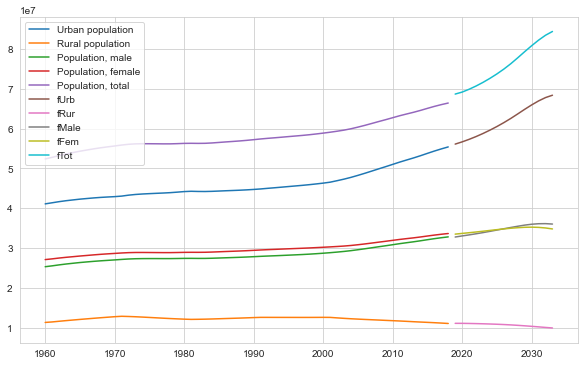

In [141]:
ax = pop_df.plot()
forecast_pop_df.plot(ax=ax, figsize=(10,6))

# Principal Component Analysis (PCA) on the whole retrieved dataset

In [198]:
stats["Indicator Name"]
#a lot of different types of data

0      Travel services (% of commercial service exports)
1      Transport services (% of commercial service ex...
2               Commercial service exports (current US$)
3      Computer, communications and other services (%...
4      Merchandise exports by the reporting economy (...
                             ...                        
510                    Arable land (hectares per person)
511                               Arable land (hectares)
512                   Agricultural land (% of land area)
513                           Agricultural land (sq. km)
514                     Agricultural machinery, tractors
Name: Indicator Name, Length: 515, dtype: object

In [199]:
stats.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              319
                 ... 
2015               58
2016               76
2017               89
2018              145
2019              496
Length: 64, dtype: int64

In [200]:
stats.drop(["1960", "1961", "1962", "1963",
           "1964", "1965", "1966", "1967",
           "1968", "1969", "1970", "1971",
           "2016", "2017", "2018", "2019"], axis=1, inplace=True)
#dropping the year columns which have too many nulls

In [201]:
stats.isnull().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
1972              17
1973              16
1974              18
1975              13
1976              14
1977              13
1978              14
1979              14
1980              16
1981              11
1982              14
1983              14
1984              14
1985              16
1986              15
1987              13
1988              19
1989              28
1990              24
1991              17
1992              20
1993              43
1994              43
1995              42
1996              43
1997              46
1998              26
1999              23
2000              22
2001              25
2002              16
2003              25
2004              17
2005              24
2006              15
2007              14
2008              15
2009              22
2010              21
2011              20
2012              23
2013              24
2014              34
2015         

In [205]:
clean_stats = stats.dropna()
#cleaning the rest of the null values,
#without losing too much data

In [210]:
clean_stats.drop(["Country Name", "Country Code", "Indicator Name",
                 "Indicator Code"], axis=1, inplace=True)
#dropping the string columns

C:\Users\techn\anaconda3\envs\tensorenv\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [211]:
clean_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 513
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1972    418 non-null    float64
 1   1973    418 non-null    float64
 2   1974    418 non-null    float64
 3   1975    418 non-null    float64
 4   1976    418 non-null    float64
 5   1977    418 non-null    float64
 6   1978    418 non-null    float64
 7   1979    418 non-null    float64
 8   1980    418 non-null    float64
 9   1981    418 non-null    float64
 10  1982    418 non-null    float64
 11  1983    418 non-null    float64
 12  1984    418 non-null    float64
 13  1985    418 non-null    float64
 14  1986    418 non-null    float64
 15  1987    418 non-null    float64
 16  1988    418 non-null    float64
 17  1989    418 non-null    float64
 18  1990    418 non-null    float64
 19  1991    418 non-null    float64
 20  1992    418 non-null    float64
 21  1993    418 non-null    float64
 22  19

In [286]:
clean_stats = clean_stats.transpose()
#years should be the rows, features should be the columns

In [288]:
clean_stats.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,506,507,508,509,510,511,512,513
1972,14.420118,50.960505,9.925695e+09,34.619378,2.474260e+10,7.976122,7.715034,1.933507,3.221569,3.677463,...,74.73,15533794.0,241930.0,0.376142,3804376.0,29.467201,0.127108,7129000.0,77.526557,187560.0
1973,14.876754,52.022847,1.199966e+10,33.100399,3.102000e+10,8.776918,6.901999,1.573179,3.284977,3.077047,...,78.40,15316018.0,241930.0,0.367875,3756082.0,29.243996,0.125902,7075000.0,77.278552,186960.0
1974,14.371403,52.920235,1.465354e+10,32.708362,3.938720e+10,8.880042,7.182029,1.189727,3.878163,3.032457,...,79.97,16394537.0,241930.0,0.359608,3752402.0,29.210929,0.125680,7067000.0,77.038813,186380.0
1975,16.683617,47.882974,1.600205e+10,35.433409,4.453600e+10,8.311478,8.750898,1.389887,5.652057,3.620666,...,64.63,13936000.0,241930.0,0.351341,3655432.0,28.392510,0.122168,6869000.0,76.811474,185830.0
1976,18.547558,45.706262,1.692450e+10,35.746180,4.548080e+10,7.251851,8.111995,1.416862,5.120622,3.218061,...,62.53,13263000.0,241930.0,0.334808,3685000.0,28.495846,0.122643,6894000.0,76.749473,185680.0


In [289]:
from sklearn.preprocessing import MinMaxScaler

In [290]:
pca_scaler = MinMaxScaler()
scaled_stats = pca_scaler.fit_transform(clean_stats)

In [291]:
from sklearn.decomposition import PCA

In [300]:
np.sqrt(np.sqrt(len(clean_stats.columns)))
#get sqrt of number of unique features

4.521620096852551

In [301]:
pca = PCA(n_components=5)
#try to reduce dataset's dimensionality to sqrt of sqrt of features

In [302]:
pca.fit(scaled_stats)

PCA(n_components=5)

In [303]:
reduced_stats = pca.transform(scaled_stats)

In [304]:
scaled_stats.shape

(44, 418)

In [306]:
reduced_stats.shape
#features now reduced to 5, from 418

(44, 5)

In [336]:
red_df = pd.DataFrame(reduced_stats)
red_df.index = clean_stats.index
red_df

,0,1,2,3,4
1972,-6.746473,2.689195,2.621690,0.635146,1.144329
1973,-6.637954,2.627177,2.650129,0.701955,0.921056
1974,-6.495203,3.365117,1.595949,0.280744,0.807841
1975,-6.363014,3.150937,1.137748,0.136286,0.255396
1976,-6.231536,2.713838,0.826495,0.009166,-0.311233
1977,-5.982131,2.253914,0.186880,-0.147572,-0.889161
1978,-5.699110,1.443172,0.177226,-0.200875,-1.009498
1979,-5.265027,1.022169,-0.423807,-0.751415,-0.861083
1980,-4.993458,0.973720,-1.411706,-1.152363,-0.785570
1981,-4.780893,0.330644,-2.041812,-1.217977,-0.998764


In [337]:
red_df.corr()
#correlation wildly varies
#seems like the reduced components are typically not correlated

,0,1,2,3,4
0,1.000000e+00,2.393854e-14,2.088186e-16,4.191176e-16,6.220051e-16
1,2.393854e-14,1.000000e+00,2.215442e-16,-3.871625e-17,-6.522801e-16
2,2.088186e-16,2.215442e-16,1.000000e+00,1.908380e-16,2.536989e-16
3,4.191176e-16,-3.871625e-17,1.908380e-16,1.000000e+00,-2.487325e-16
4,6.220051e-16,-6.522801e-16,2.536989e-16,-2.487325e-16,1.000000e+00


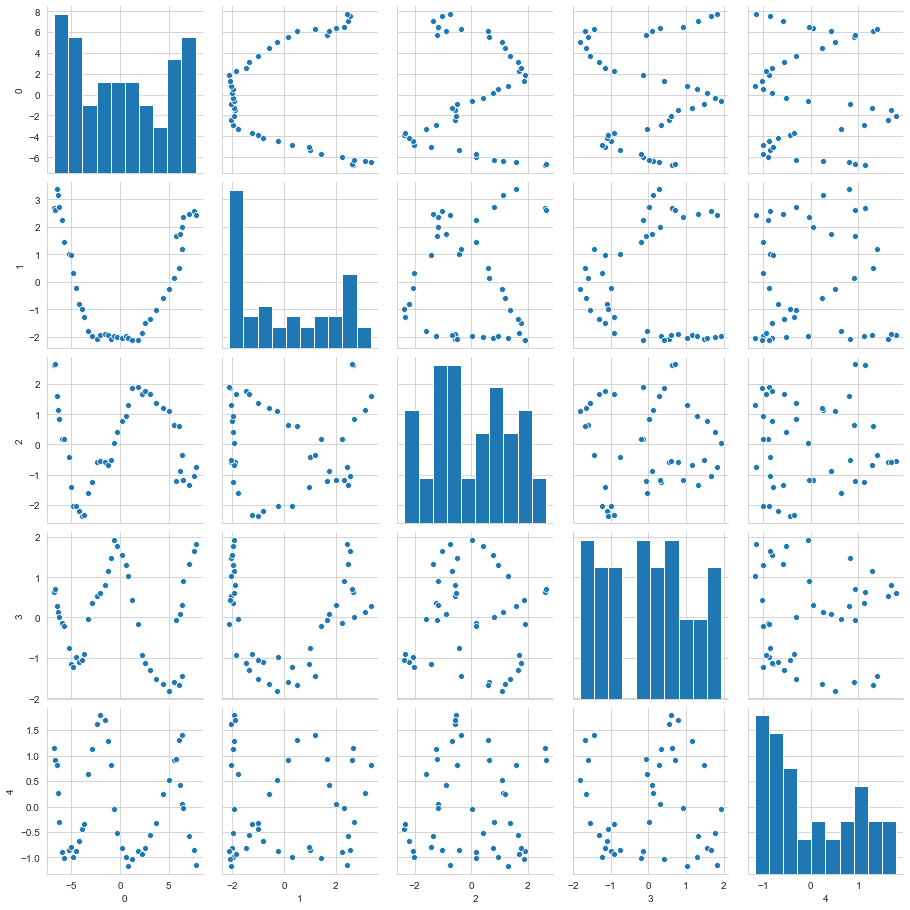

In [338]:
sns.pairplot(red_df)
#on the other hand, we can see some cyclical patterns emerge
#when compared with each other